In [1]:
true_labels= [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6,
       6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]

In [2]:
predicted_labels = [0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 1, 1, 4, 0, 1, 1, 4, 1, 2, 2, 2, 2,
       0, 2, 2, 2, 3, 2, 4, 2, 5, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 5,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 4, 5, 5, 5, 5, 5, 5, 8, 5, 6,
       6, 6, 6, 4, 6, 5, 7, 7, 7, 7, 7, 0, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]

In [4]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(predicted_labels, true_labels)

In [5]:
cm

array([[ 9,  1,  1,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  5,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  9,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 13,  1,  0,  0,  0,  0,  0],
       [ 1,  2,  1,  1,  9,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  6,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  5,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  9,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 15,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 10]])

Text(95.5815972222222, 0.5, 'True Class')

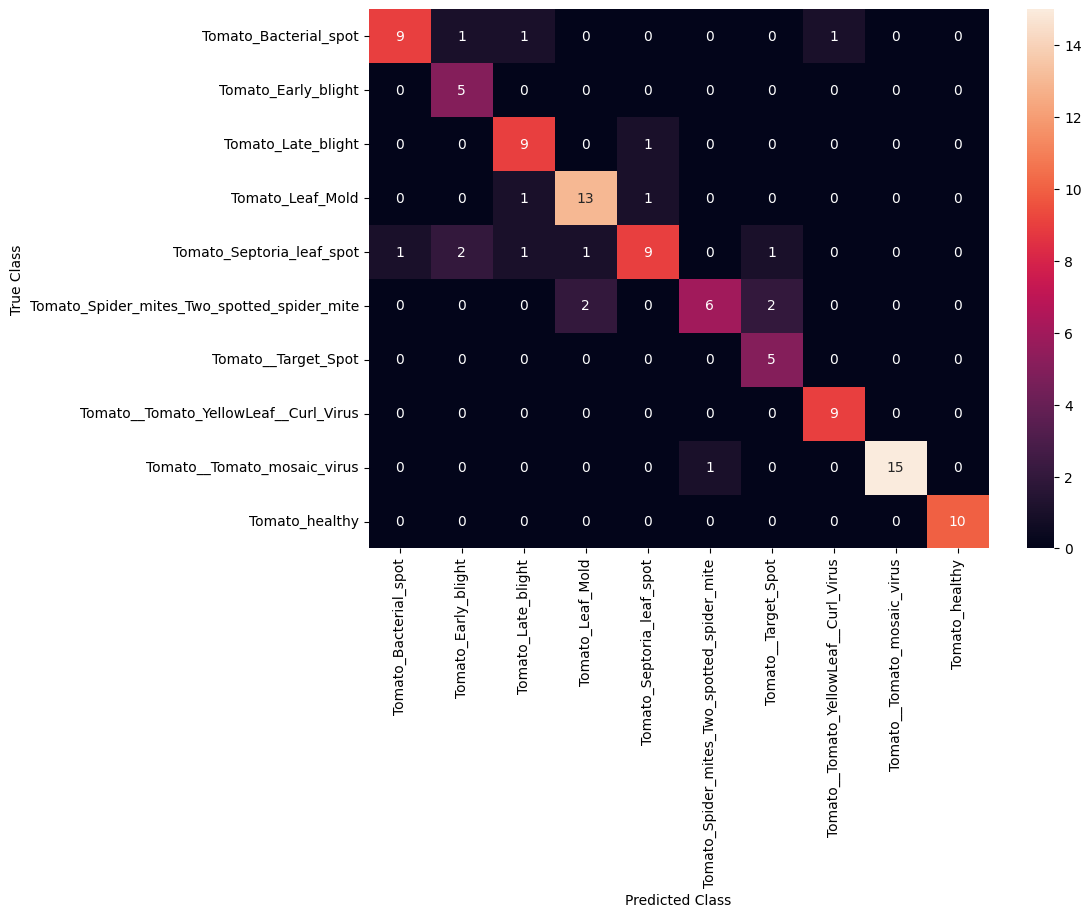

In [6]:
import matplotlib.pylab as plt
import seaborn as sn
labels = ['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Class')
plt.ylabel('True Class')

In [7]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(true_labels, predicted_labels, average='macro')
recall = recall_score(true_labels, predicted_labels, average='macro')

print('Precision: ', precision)
print('Recall: ', recall)

l = len(true_labels)
acc = sum([predicted_labels[i] == true_labels[i] for i in range(l)]) / l
print('Accuracy: ', acc)

Precision:  0.8654166666666667
Recall:  0.8287824675324675
Accuracy:  0.8411214953271028


In [8]:
from sklearn.metrics import classification_report
print(classification_report(true_labels,predicted_labels))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       1.00      0.62      0.77         8
           2       0.90      0.75      0.82        12
           3       0.87      0.81      0.84        16
           4       0.60      0.82      0.69        11
           5       0.60      0.86      0.71         7
           6       1.00      0.62      0.77         8
           7       1.00      0.90      0.95        10
           8       0.94      1.00      0.97        15
           9       1.00      1.00      1.00        10

    accuracy                           0.84       107
   macro avg       0.87      0.83      0.83       107
weighted avg       0.87      0.84      0.84       107



In [9]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print("Accuracy=",accuracy_score(true_labels,predicted_labels))
print("F1 Score=",f1_score(true_labels,predicted_labels, average="macro"))
print("Precision=",precision_score(true_labels,predicted_labels, average="macro"))
print("Recall=",recall_score(true_labels,predicted_labels, average="macro"))

Accuracy= 0.8411214953271028
F1 Score= 0.8326835254029902
Precision= 0.8654166666666667
Recall= 0.8287824675324675


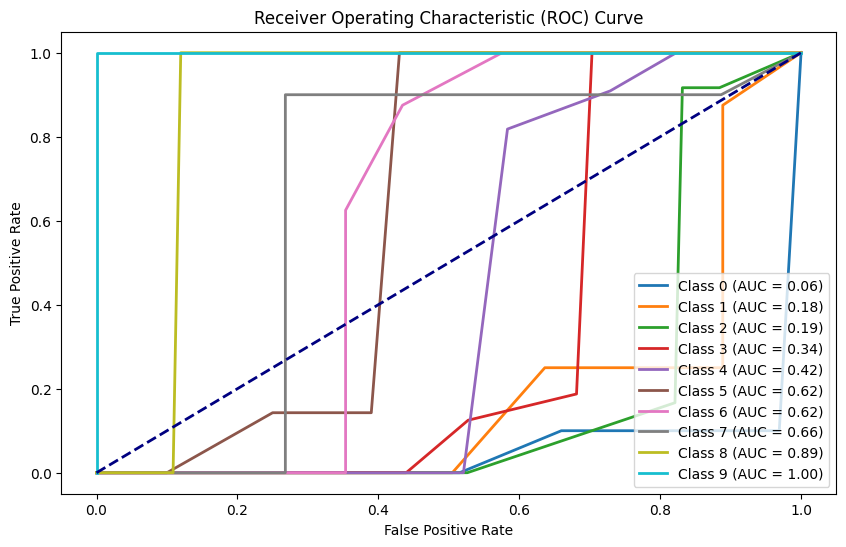

In [10]:
import matplotlib.pylab as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

num_classes = len(set(true_labels))

binarized_true_labels = label_binarize(true_labels, classes=list(range(num_classes)))

plt.figure(figsize=(10, 6))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(binarized_true_labels[:, i], predicted_labels)

    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



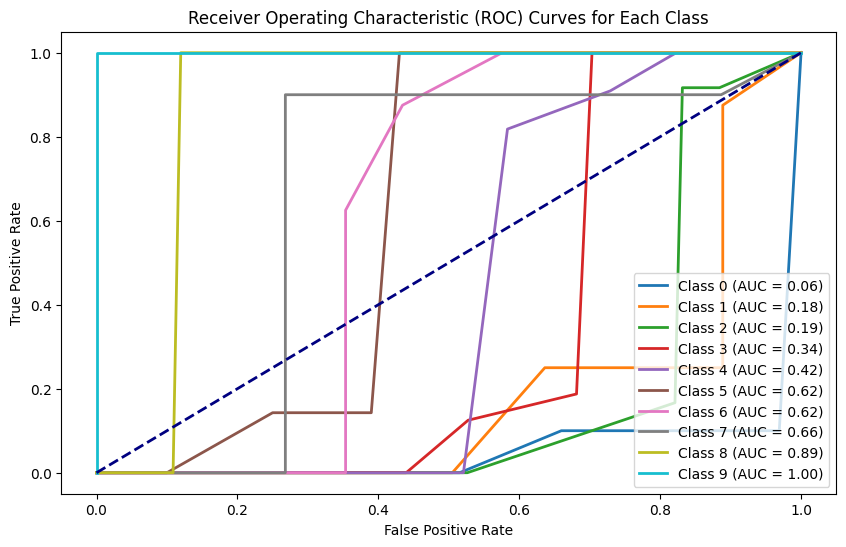

In [11]:
import matplotlib.pylab as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
num_classes = len(set(true_labels))

binarized_true_labels = label_binarize(true_labels, classes=list(range(num_classes)))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(binarized_true_labels[:, i], predicted_labels)  # Changed this line
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Each Class')
plt.legend(loc='lower right')
plt.show()

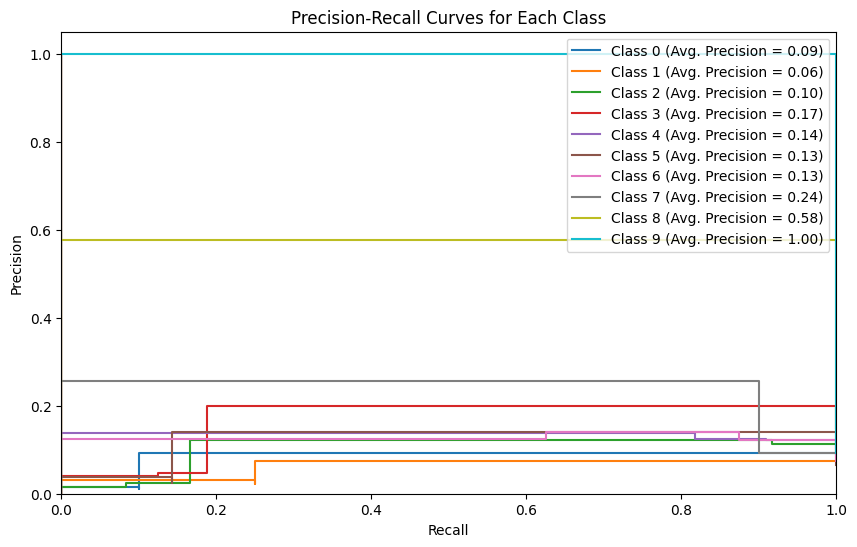

In [12]:
import matplotlib.pylab as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

num_classes = len(set(true_labels))

binarized_true_labels = label_binarize(true_labels, classes=list(range(num_classes)))

precision = dict()
recall = dict()
average_precision = dict()

for i in range(num_classes):
    precision[i], recall[i], _ = precision_recall_curve(
        binarized_true_labels[:, i], predicted_labels
    )
    average_precision[i] = average_precision_score(
        binarized_true_labels[:, i], predicted_labels
    )

plt.figure(figsize=(10, 6))
for i in range(num_classes):
    plt.step(
        recall[i],
        precision[i],
        where="post",
        label=f"Class {i} (Avg. Precision = {average_precision[i]:.2f})",
    )

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title("Precision-Recall Curves for Each Class")
plt.legend(loc="upper right")
plt.show()

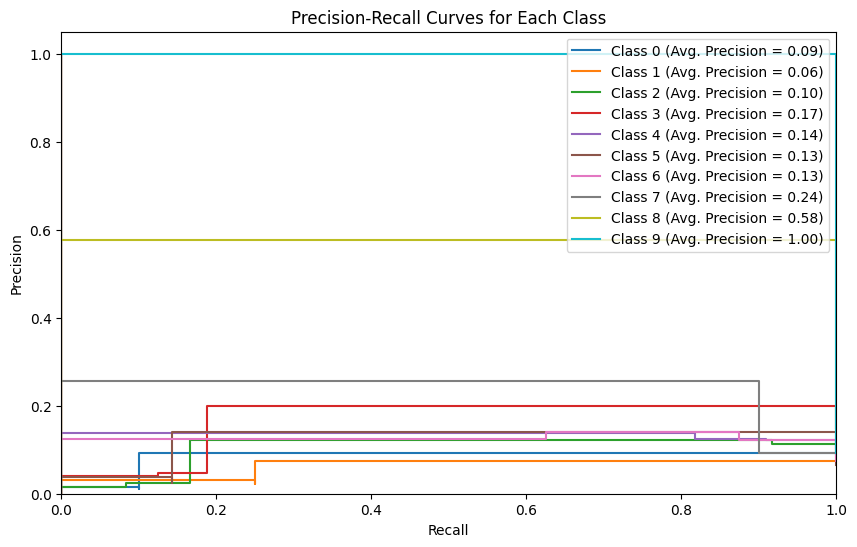

In [13]:
import matplotlib.pylab as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
num_classes = len(set(true_labels))
binarized_true_labels = label_binarize(true_labels, classes=list(range(num_classes)))

precision = dict()
recall = dict()
average_precision = dict()
for i in range(num_classes):
    precision[i], recall[i], _ = precision_recall_curve(
        binarized_true_labels[:, i], predicted_labels
    )
    average_precision[i] = average_precision_score(
        binarized_true_labels[:, i], predicted_labels
    )

plt.figure(figsize=(10, 6))
for i in range(num_classes):
    plt.step(
        recall[i],
        precision[i],
        where="post",
        label=f"Class {i} (Avg. Precision = {average_precision[i]:.2f})",
    )

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title("Precision-Recall Curves for Each Class")
plt.legend(loc="upper right")
plt.show()

In [15]:
acc= [0.33973589539527893,
 0.6962785124778748,
 0.7743096947669983,
 0.7815126180648804,
 0.8703481554985046,
 0.860744297504425,
 0.9207683205604553,
 0.8835534453392029,
 0.9267706871032715,
 0.9135653972625732,
 0.9495798349380493,
 0.9699879884719849,
 0.9699879884719849,
 0.981992781162262,
 0.9879952073097229,
 0.9795918464660645,
 0.989195704460144,
 0.9807923436164856,
 0.9879952073097229,
 0.9903961420059204,
 0.9903961420059204,
 0.9951980710029602,
 0.9939975738525391,
 0.9927971363067627,
 0.9951980710029602,
 0.9975990653038025,
 0.9951980710029602,
 0.9975990653038025,
 0.9987995028495789,
 0.9975990653038025,
 0.9975990653038025,
 0.9987995028495789,
 0.9987995028495789,
 0.9987995028495789,
 0.9987995028495789,
 0.9975990653038025,
 1.0,
 0.9987995028495789,
 0.9987995028495789,
 0.9987995028495789,
 0.9987995028495789,
 1.0,
 0.9987995028495789,
 0.9927971363067627,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9987995028495789,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9987995028495789,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9987995028495789,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9987995028495789,
 0.9975990653038025,
 0.9987995028495789,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [16]:
val_acc=[0.5420560836791992,
 0.5887850522994995,
 0.6542056202888489,
 0.644859790802002,
 0.6168224215507507,
 0.7102803587913513,
 0.7009345889091492,
 0.7009345889091492,
 0.672897219657898,
 0.7289719581604004,
 0.672897219657898,
 0.7289719581604004,
 0.7196261882781982,
 0.7570093274116516,
 0.7383177280426025,
 0.7102803587913513,
 0.7570093274116516,
 0.7289719581604004,
 0.7383177280426025,
 0.6915887594223022,
 0.7289719581604004,
 0.7196261882781982,
 0.7850467562675476,
 0.7102803587913513,
 0.7196261882781982,
 0.7663551568984985,
 0.7289719581604004,
 0.7476635575294495,
 0.7757009267807007,
 0.7757009267807007,
 0.7570093274116516,
 0.7289719581604004,
 0.7289719581604004,
 0.7102803587913513,
 0.7570093274116516,
 0.7196261882781982,
 0.7476635575294495,
 0.7570093274116516,
 0.7757009267807007,
 0.7663551568984985,
 0.7196261882781982,
 0.7663551568984985,
 0.7476635575294495,
 0.7476635575294495,
 0.7663551568984985,
 0.7383177280426025,
 0.7570093274116516,
 0.7383177280426025,
 0.7476635575294495,
 0.7570093274116516,
 0.7757009267807007,
 0.7570093274116516,
 0.7476635575294495,
 0.7383177280426025,
 0.7757009267807007,
 0.7476635575294495,
 0.7102803587913513,
 0.7663551568984985,
 0.7663551568984985,
 0.7476635575294495,
 0.7476635575294495,
 0.7757009267807007,
 0.7476635575294495,
 0.7570093274116516,
 0.7570093274116516,
 0.7476635575294495,
 0.7663551568984985,
 0.7476635575294495,
 0.7570093274116516,
 0.7757009267807007,
 0.7663551568984985,
 0.7570093274116516,
 0.7757009267807007,
 0.7570093274116516,
 0.7570093274116516,
 0.7383177280426025,
 0.7570093274116516,
 0.7850467562675476,
 0.7289719581604004,
 0.7757009267807007,
 0.7476635575294495,
 0.7476635575294495,
 0.7289719581604004,
 0.7570093274116516,
 0.7383177280426025,
 0.7663551568984985,
 0.7663551568984985,
 0.7289719581604004,
 0.7476635575294495,
 0.7476635575294495,
 0.7476635575294495,
 0.7850467562675476,
 0.7570093274116516,
 0.7570093274116516,
 0.7476635575294495,
 0.7943925261497498,
 0.7757009267807007,
 0.7570093274116516,
 0.7289719581604004,
 0.7570093274116516]

In [17]:
loss=[2.227555274963379,
 1.0171313285827637,
 0.6967002153396606,
 0.6684039831161499,
 0.4295625686645508,
 0.44333556294441223,
 0.31297552585601807,
 0.4389025568962097,
 0.25206315517425537,
 0.2845170795917511,
 0.19535386562347412,
 0.14383451640605927,
 0.13455992937088013,
 0.11355142295360565,
 0.09641896933317184,
 0.10021068900823593,
 0.08573055267333984,
 0.09960272908210754,
 0.07376645505428314,
 0.06707025319337845,
 0.06903409957885742,
 0.05505475401878357,
 0.0548865981400013,
 0.05230371281504631,
 0.055103205144405365,
 0.04556909576058388,
 0.041889771819114685,
 0.04075375571846962,
 0.031498562544584274,
 0.030534302815794945,
 0.02994067408144474,
 0.028821084648370743,
 0.024896468967199326,
 0.024600030854344368,
 0.026029929518699646,
 0.03462088480591774,
 0.024284586310386658,
 0.023145904764533043,
 0.020122511312365532,
 0.025396643206477165,
 0.023540599271655083,
 0.020466193556785583,
 0.02398756518959999,
 0.04183496534824371,
 0.017812861129641533,
 0.01562744565308094,
 0.01730901561677456,
 0.013317923992872238,
 0.01276111789047718,
 0.011571175418794155,
 0.013488845899701118,
 0.01283005066215992,
 0.011108014732599258,
 0.011955955997109413,
 0.012095739133656025,
 0.010652006603777409,
 0.013437125831842422,
 0.009824174456298351,
 0.010272669605910778,
 0.01017999928444624,
 0.008857926353812218,
 0.007968505844473839,
 0.011099549010396004,
 0.009161853231489658,
 0.00650354940444231,
 0.009852685034275055,
 0.00804365985095501,
 0.009405476972460747,
 0.007719871122390032,
 0.007881947793066502,
 0.00705574918538332,
 0.0064998529851436615,
 0.0063626402989029884,
 0.005497659556567669,
 0.005364870186895132,
 0.005094022024422884,
 0.005821166094392538,
 0.005614628084003925,
 0.005926630925387144,
 0.007837535813450813,
 0.010639803484082222,
 0.0067558735609054565,
 0.006835893262177706,
 0.005897871218621731,
 0.005119884852319956,
 0.004764695186167955,
 0.004131492227315903,
 0.004703639540821314,
 0.005401396192610264,
 0.004905558191239834,
 0.0040219975635409355,
 0.004965699277818203,
 0.004185759462416172,
 0.005395397078245878,
 0.004508955404162407,
 0.003820936195552349,
 0.0038802744820713997,
 0.0035655535757541656,
 0.0057072993367910385,
 0.003920292481780052]

In [18]:
val_loss=[1.7188239097595215,
 1.2983027696609497,
 1.101367473602295,
 1.1973892450332642,
 1.1015362739562988,
 0.9142341017723083,
 0.8425878286361694,
 0.8806685209274292,
 0.9604606032371521,
 0.8548279404640198,
 0.9541120529174805,
 0.8321610689163208,
 0.8634739518165588,
 0.7828342914581299,
 0.7647303938865662,
 0.8167240023612976,
 0.7695631980895996,
 0.8419046401977539,
 0.8554549813270569,
 0.9525516033172607,
 0.7964087724685669,
 0.8112285733222961,
 0.7242050766944885,
 0.9335277676582336,
 0.9140404462814331,
 0.7430086135864258,
 0.8573413491249084,
 0.8438836336135864,
 0.8047119379043579,
 0.7812089920043945,
 0.8040665984153748,
 0.8968672156333923,
 0.8605976700782776,
 0.842119574546814,
 0.8620222806930542,
 0.8739961981773376,
 0.8181937336921692,
 0.8233253359794617,
 0.8675074577331543,
 0.8077203035354614,
 0.9574987292289734,
 0.8576726913452148,
 0.9285035133361816,
 0.8008782863616943,
 0.8386576175689697,
 0.7845276594161987,
 0.7849385142326355,
 0.8488878607749939,
 0.8415486812591553,
 0.8215910792350769,
 0.797821044921875,
 0.8520687222480774,
 0.8888498544692993,
 0.8185150027275085,
 0.8149647116661072,
 0.88460773229599,
 0.8770442008972168,
 0.8272388577461243,
 0.8065206408500671,
 0.8818367719650269,
 0.836418092250824,
 0.822307825088501,
 0.7978367209434509,
 0.837226390838623,
 0.8339875340461731,
 0.9006586074829102,
 0.787889838218689,
 0.863103449344635,
 0.8639345765113831,
 0.8597775101661682,
 0.8714831471443176,
 0.831013023853302,
 0.8627384901046753,
 0.8765686750411987,
 0.8351556062698364,
 0.8340432643890381,
 0.8751944899559021,
 0.8302885293960571,
 0.9086499214172363,
 0.8004196286201477,
 0.9947229623794556,
 0.8807926177978516,
 0.823769211769104,
 0.8518546223640442,
 0.9076167345046997,
 0.897203803062439,
 0.8660374283790588,
 0.9111613631248474,
 0.8478437662124634,
 0.8554983139038086,
 0.861699640750885,
 0.8394957780838013,
 0.9241406321525574,
 0.8508506417274475,
 0.89239901304245,
 0.8739138245582581,
 0.914330244064331,
 0.8573678135871887,
 0.9370971918106079,
 0.8974750638008118]

In [19]:
EPOCHS=100

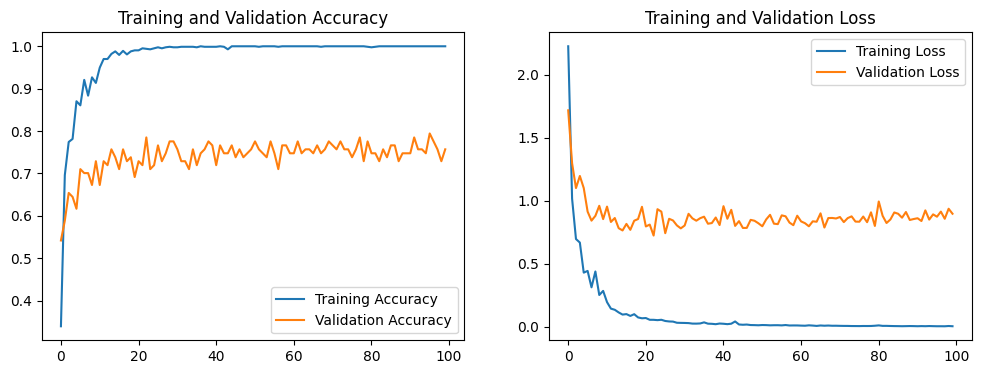

In [20]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()